In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
import os

In [5]:
# for traversing through the folders and going through the csv files one by one
def fun(folder):
    header = ['Date',folder]
    filename = f"{folder}.csv"
    with open(filename, 'w', newline='') as csvfile:
        writer1 = csv.writer(csvfile) # creating object for writing into the new file created 
        writer1.writerow(header) # writing down the headers as mentioned above
        # walk function is used to traversing through every possible folder and file directory of the folder
        for dirpath, dirnames, filenames in os.walk(f"C:\\Users\\Isha\\Documents\\pv doctor assignment\\Assignments - Data Analytics Intern\\data\\{folder}"):
            for file in filenames:
                path = os.path.join(dirpath, file) # to have the full path of the file(combining)
                with open(path,'r') as csvfile1:
                    lines = csvfile1.readlines() # to read all the lines from the old csv file one by one
                    data_lines = lines[1:] # excluding headers
                    for line in data_lines:
                        csvfile.write(line) # writing down the values one by one

In [7]:
# calling function for 'GHI' folder
fun('GHI')

In [8]:
# calling function for 'PR' folder
fun('PR')

In [11]:
# creating dataframes of the files and deleting the duplicate values if there are any
df1 = pd.read_csv('GHI.csv')
df1.drop_duplicates(inplace=True)
df2 = pd.read_csv('PR.csv')
df2.drop_duplicates(inplace=True)
print(df1.shape)
print(df2.shape)

(982, 2)
(982, 2)


In [13]:
# merging both the dataframes into 1 so with inner join(so that only common part is extracted)
df = pd.merge(df1,df2, on='Date', how='inner')
df.head(10)

,Date,GHI,PR
0,2019-07-01,3.256608,69.575676
1,2019-07-02,3.976767,79.314411
2,2019-07-03,2.811867,61.020006
3,2019-07-04,3.658408,83.262576
4,2019-07-05,5.590683,82.124440
5,2019-07-06,5.179733,82.764172
6,2019-07-07,4.120733,69.924507
7,2019-07-08,5.707992,84.789151
8,2019-07-09,6.469825,79.152393
9,2019-07-10,5.811892,69.085899


In [19]:
df.to_csv('finaldata.csv', index=False)

In [7]:
print(df['PR'].min())
print(df['PR'].max())

60.02388617
84.98011969


In [8]:
df.shape

(982, 3)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    982 non-null    object 
 1   GHI     982 non-null    float64
 2   PR      982 non-null    float64
dtypes: float64(2), object(1)
memory usage: 23.1+ KB


In [10]:
# creating a copy of df so that original dataframe is maitained
df2 = df

In [11]:
# changing the type of the attributes to relevant types
df['PR'] = df['PR'].astype(int)
df['GHI'] = df['GHI'].astype(int)
df['Date'] = pd.to_datetime(df['Date'])
# seeting date as index
df.set_index('Date', inplace=True)

for plot3

In [13]:
# creating rolling average of the PR for the line graph made for the continous mean of the PR 
window_size = 30
rolling_avg = df['PR'].rolling(window=window_size).mean()

for plot1

In [15]:
# creating function for color list for each of the PR values so that according to the condition each dot is displayed with relevant color according 
# to the condition
def pltcolor(lst):
    cols=[]
    for l in lst:
        if l < 2:
            cols.append('navy')
        elif l < 4:
            cols.append('blue')
        elif l < 6:
            cols.append('orange')
        else:
            cols.append('brown')
    return cols

In [16]:
# calling function for creation of the list as returned by the function
cols = pltcolor(df['GHI'])

for legend1

In [18]:
# creating legend patches
legend_elements = [
    mpatches.Patch(color='navy', label='PR < 2'),
    mpatches.Patch(color='blue', label='2 ≤ PR < 4'),
    mpatches.Patch(color='orange', label='4 ≤ PR < 6'),
    mpatches.Patch(color='brown', label='PR ≥ 6')
]

for legend2

In [20]:
# creating average list of last values of the PR one by one , number by number 
numlist = [7,30,60,90,365] 
 # list of the values(average values)
avglist = []
# list of the text to be written
headings = []
for i in numlist:
    avglist.append(df['PR'][df.shape[0]-i+1:].mean())
    headings.append(f"Average PR last {i}-d: ")
# for last average value (which is for full dataframe)
avglist.append(df['PR'].mean())
headings.append("Aveage PR Lifetime: ")

In [21]:
avglist

[74.33333333333333,
 71.20689655172414,
 72.57627118644068,
 72.49438202247191,
 72.31043956043956,
 72.20468431771894]

In [22]:
headings

['Average PR last 7-d: ',
 'Average PR last 30-d: ',
 'Average PR last 60-d: ',
 'Average PR last 90-d: ',
 'Average PR last 365-d: ',
 'Aveage PR Lifetime: ']

In [23]:
# zipping the text and values together to be display on the plot using zip function
legend_labels = [f"{heading} {avg}" for heading, avg in zip(headings, avglist)]

In [24]:
legend_labels

['Average PR last 7-d:  74.33333333333333',
 'Average PR last 30-d:  71.20689655172414',
 'Average PR last 60-d:  72.57627118644068',
 'Average PR last 90-d:  72.49438202247191',
 'Average PR last 365-d:  72.31043956043956',
 'Aveage PR Lifetime:  72.20468431771894']

for plot4

In [26]:
# creating target list for the PR
targetlist = [None]*df.shape[0]
budgetline = [73.9]
for i in range(2):
    budgetline.append(budgetline[i]-budgetline[i]*0.008)
budgetline

[73.9, 73.3088, 72.72232960000001]

for legend5

In [28]:
# extracting months and years into 2 lists
monthlist = df.index.month
yearlist = df.index.year
yearlist[0]

2019

In [29]:
# for each year , a different target is to be assign for the PR value
for i in range(df.shape[0]):
    if (yearlist[i] == 2019):
        targetlist[i] = budgetline[0]
    elif (yearlist[i] == 2020):
        if (monthlist[i] <= 6):
            targetlist[i] = budgetline[0]
        else:
            targetlist[i] = budgetline[1]
    elif (yearlist[i] == 2021):
        if (monthlist[i] <= 6):
            targetlist[i] = budgetline[1]
        else:
            targetlist[i] = budgetline[2]
    else:
        targetlist[i] = budgetline[2]

In [30]:
# counting the values of PR which are greater than its target value
count = len([x for x in df['PR'] if x > targetlist[i]])
count

488

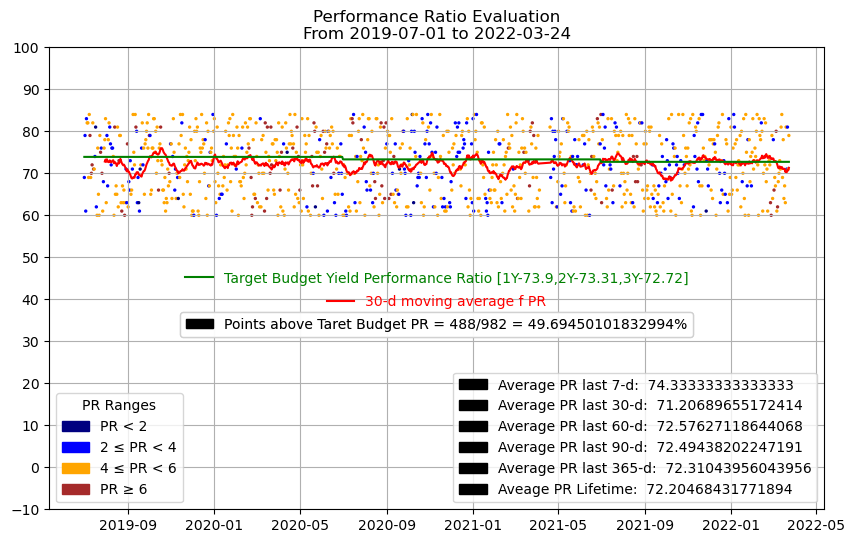

<Figure size 640x480 with 0 Axes>

In [57]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (10,6))

# plot1
ax.scatter(df.index, df['PR'], c=cols, marker='o', s=2)  
# legend1
legend1 = ax.legend(handles=legend_elements, title='PR Ranges',loc='lower left')
ax.add_artist(legend1)

# legend2
legend_patch_1 = [Patch(color='black', label=label) for label in legend_labels]
legend2 = ax.legend(handles = legend_patch_1,loc='lower right')
ax.add_artist(legend2)

# plot3
line1, = ax.plot(df.index, rolling_avg, label='30-d moving average f PR',color = 'red')
#legend3
legend3 = ax.legend(loc='center', handles = [line1], bbox_to_anchor=(0.5, 0.45), frameon=False)
plt.setp(legend3.get_texts(), color='r')
ax.add_artist(legend3)

# plot4
line2, = ax.plot(df.index, targetlist, 
        label=f'Target Budget Yield Performance Ratio [1Y-{budgetline[0]:1.1f},2Y-{budgetline[1]:1.2f},3Y-{budgetline[2]:1.2f}]',
        color = 'green')
#legend4
legend4 = ax.legend(loc='center', handles= [line2], bbox_to_anchor=(0.5, 0.5), frameon=False)
plt.setp(legend4.get_texts(), color='g')
ax.add_artist(legend4)

# legend5
legend_patch = Patch(color='black', label=f'Points above Taret Budget PR = {count}/{df.shape[0]} = {count/df.shape[0]*100}%')
legend5 = ax.legend(handles = [legend_patch],loc='center',bbox_to_anchor=(0.5, 0.4))
ax.add_artist(legend5)

ax.set_title('''Performance Ratio Evaluation
From 2019-07-01 to 2022-03-24''')

ax.grid(True)
ax.set_yticks(np.arange(-10,110,10))
plt.show()
plt.savefig('fig.png')
